In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_dict = {
    "read_air_reserve" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/air_reserve.csv",
    "read_air_store_info" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/air_store_info.csv",
    "read_air_visit_data" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/air_visit_data.csv",
    "read_date_info" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/date_info.csv",
    "read_hpg_reserve" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/hpg_reserve.csv",
    "read_hpg_store_info" : "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/hpg_store_info.csv",
    "read_sample_submission": "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/sample_submission.csv",
    "read_store_id_relation": "/media/andraa/10160545101605452/kaggle/restaurant_forecast/data/raw/store_id_relation.csv"
    
}

# Reservations made in the air system

In [3]:
air_reserve_df = pd.read_csv(path_dict["read_air_reserve"])

In [4]:
air_reserve_df.shape

(92378, 4)

In [5]:
air_reserve_df.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [6]:
air_reserve_df.dtypes

air_store_id        object
visit_datetime      object
reserve_datetime    object
reserve_visitors     int64
dtype: object

convert string to datetime 

In [7]:
air_reserve_df["reserve_datetime"] = pd.to_datetime(air_reserve_df["reserve_datetime"])
air_reserve_df["visit_datetime"] = pd.to_datetime(air_reserve_df["visit_datetime"])

- see how many unique restaurants are registered in the air system
- see how many customers per restaurant there are

In [8]:
len(air_reserve_df.air_store_id.unique())

314

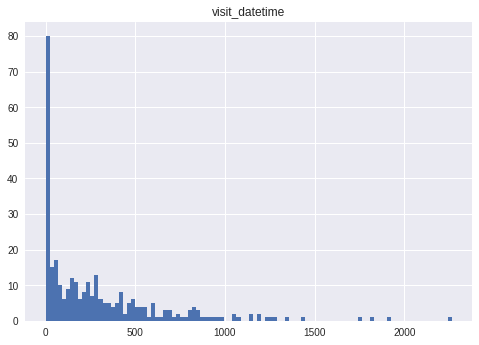

In [9]:
air_reserve_df.groupby("air_store_id").count()["visit_datetime"].to_frame().hist("visit_datetime", bins = 100)
plt.show()

see the difference in hours between reservation time and the actual date of the visit

In [10]:
air_reserve_df["reserve_to_visit_hour"] = air_reserve_df["visit_datetime"] - air_reserve_df["reserve_datetime"]
air_reserve_df["reserve_to_visit_hour"] = air_reserve_df["reserve_to_visit_hour"].apply(lambda x: x.days)

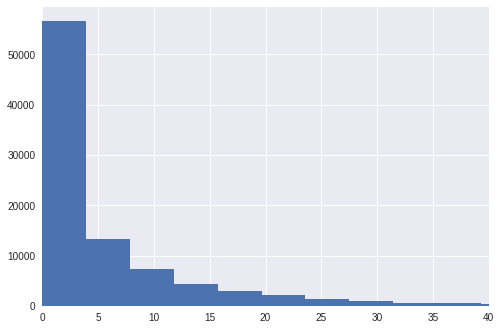

In [12]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,40)
air_reserve_df["reserve_to_visit_hour"].hist(bins = 100, ax = ax) 
plt.show()

In [58]:
# see whether there is a correlation between number of people and the difference between visit and time of reservation

In [60]:
air_reserve_df[["reserve_to_visit_hour", "reserve_visitors"]].corr()

,reserve_to_visit_hour,reserve_visitors
reserve_to_visit_hour,1.000000,0.172587
reserve_visitors,0.172587,1.000000


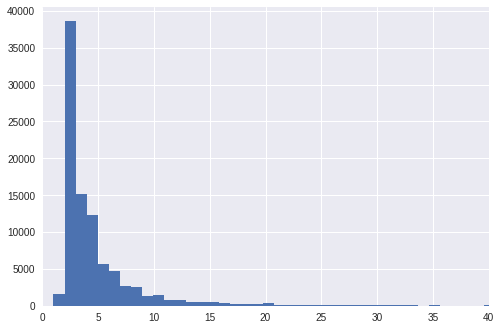

In [13]:
# global distribution of number of people that reserve tables
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,40)
air_reserve_df["reserve_visitors"].hist(bins = 100, ax = ax) 
plt.show()

# Reservations made in the hpg system

In [15]:
hpg_reserve_df = pd.read_csv(path_dict["read_hpg_reserve"])

In [16]:
hpg_reserve_df.shape

(2000320, 4)

In [21]:
len(hpg_reserve_df.hpg_store_id.unique())

13325

In [17]:
hpg_reserve_df.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [18]:
hpg_reserve_df["reserve_datetime"] = pd.to_datetime(hpg_reserve_df["reserve_datetime"])
hpg_reserve_df["visit_datetime"] = pd.to_datetime(hpg_reserve_df["visit_datetime"])

In [23]:
hpg_reserve_df["reserve_to_visit_hour"] = hpg_reserve_df["visit_datetime"] - hpg_reserve_df["reserve_datetime"]
hpg_reserve_df["reserve_to_visit_hour"] = hpg_reserve_df["reserve_to_visit_hour"].apply(lambda x: x.days)

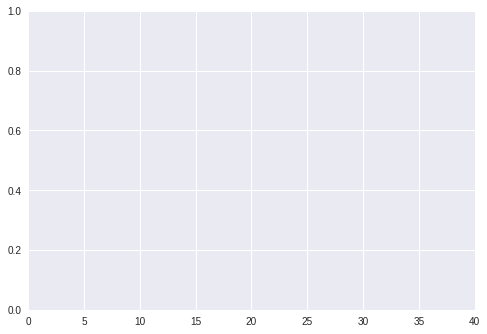

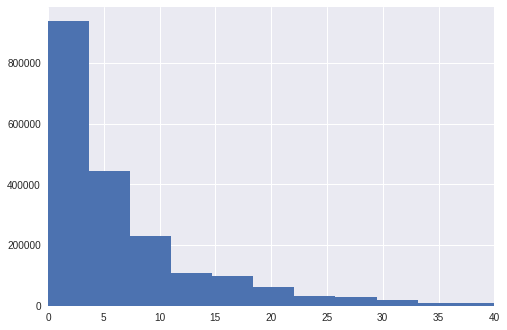

In [24]:
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,40)
hpg_reserve_df["reserve_to_visit_hour"].hist(bins = 100, ax = ax) 
plt.show()

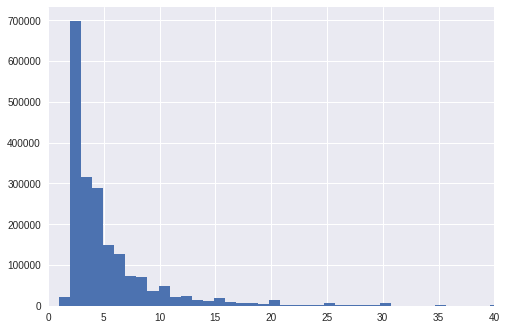

In [25]:
# global distribution of number of people that reserve tables
fig=plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,40)
hpg_reserve_df["reserve_visitors"].hist(bins = 100, ax = ax) 
plt.show()

# air store info

In [26]:
air_store_info_df = pd.read_csv(path_dict["read_air_store_info"])

In [27]:
air_store_info_df.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [29]:
print("number of restaurants", len(air_store_info_df.air_store_id.unique()))
print("number of different genres", len(air_store_info_df.air_genre_name.unique()))
print("number of different areas", len(air_store_info_df.air_area_name.unique()))

number of restaurants 829
number of different genres 14
number of different areas 103


# store id relation

In [30]:
store_id_relation_df = pd.read_csv(path_dict["read_store_id_relation"])

In [31]:
store_id_relation_df.shape

(150, 2)

In [46]:
store_id_relation_df.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


# air visit data

In [32]:
air_visit_data_df = pd.read_csv(path_dict["read_air_visit_data"])

In [34]:
air_visit_data_df.shape

(252108, 3)

In [35]:
air_visit_data_df.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [37]:
len(air_visit_data_df.air_store_id.unique())

829

# sample_submission

In [38]:
sample_submission_df = pd.read_csv(path_dict["read_sample_submission"])

In [39]:
sample_submission_df.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [40]:
sample_submission_df["air_store_id"] = sample_submission_df["id"].apply(lambda x: x[:20])

In [41]:
sample_submission_df.head()

,id,visitors,air_store_id
0,air_00a91d42b08b08d9_2017-04-23,0,air_00a91d42b08b08d9
1,air_00a91d42b08b08d9_2017-04-24,0,air_00a91d42b08b08d9
2,air_00a91d42b08b08d9_2017-04-25,0,air_00a91d42b08b08d9
3,air_00a91d42b08b08d9_2017-04-26,0,air_00a91d42b08b08d9
4,air_00a91d42b08b08d9_2017-04-27,0,air_00a91d42b08b08d9


In [42]:
len(sample_submission_df["air_store_id"].unique())

821

# date_info

In [43]:
date_info_df = pd.read_csv(path_dict["read_date_info"])

In [44]:
date_info_df.shape

(517, 3)

In [45]:
date_info_df.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


# see if there is extra info for the restaurants logged in thetwo systems

In [49]:
# store_id_relation_df

air_reserve_common_df = air_reserve_df[air_reserve_df["air_store_id"].isin(set(store_id_relation_df["air_store_id"].values))]
hpg_reserve_common_df = hpg_reserve_df[hpg_reserve_df["hpg_store_id"].isin(set(store_id_relation_df["hpg_store_id"].values))]


In [51]:
print(len(air_reserve_common_df["air_store_id"].unique()))
print(len(hpg_reserve_common_df["hpg_store_id"].unique()))

131
150
